In [104]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
import h5py
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [62]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [63]:
#cargo csvs:
data=pd.read_csv("./Features/features3.csv")#training data
t1data=pd.read_csv("./Features/features_test_1.csv")#test songs 1 row
t2data=pd.read_csv("./Features/features_test_2.csv")#test songs 2 rows
t3data=pd.read_csv("./Features/features_test_3.csv")#test songs 3 rows

In [64]:
X=data.drop('genre',axis=1)
Xt1=t1data.drop('genre',axis=1)
Xt2=t2data.drop('genre',axis=1)
Xt3=t3data.drop('genre',axis=1)

In [65]:
y=data.genre
yt1=t1data.genre
yt2=t2data.genre
yt3=t3data.genre

In [66]:
scaled_features = StandardScaler().fit_transform(X.values)
sc1=StandardScaler().fit_transform(Xt1.values)
sc2=StandardScaler().fit_transform(Xt2.values)
sc3=StandardScaler().fit_transform(Xt3.values)

X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
Xt1=pd.DataFrame(sc1, index=Xt1.index, columns=Xt1.columns)
Xt2=pd.DataFrame(sc2, index=Xt2.index, columns=Xt2.columns)
Xt3=pd.DataFrame(sc3, index=Xt3.index, columns=Xt3.columns)

In [67]:
X.shape

(2970, 39)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
from keras import models
from keras import layers

model1 = models.Sequential()

model1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(10, activation='softmax'))

In [112]:

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
history = model1.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=256,validation_split=0.1)

Train on 2138 samples, validate on 238 samples
Epoch 1/50
2138/2138 [==============================] - 3s 1ms/step - loss: 2.2012 - acc: 0.2072 - val_loss: 1.9199 - val_acc: 0.3445
Epoch 2/50
2138/2138 [==============================] - 0s 48us/step - loss: 1.8020 - acc: 0.3634 - val_loss: 1.6258 - val_acc: 0.3782
Epoch 3/50
2138/2138 [==============================] - 0s 56us/step - loss: 1.5629 - acc: 0.4509 - val_loss: 1.3729 - val_acc: 0.4832
Epoch 4/50
2138/2138 [==============================] - 0s 52us/step - loss: 1.4161 - acc: 0.4892 - val_loss: 1.2311 - val_acc: 0.5378
Epoch 5/50
2138/2138 [==============================] - 0s 50us/step - loss: 1.3043 - acc: 0.5365 - val_loss: 1.1170 - val_acc: 0.5882
Epoch 6/50
2138/2138 [==============================] - 0s 54us/step - loss: 1.2044 - acc: 0.5655 - val_loss: 1.0454 - val_acc: 0.6345
Epoch 7/50
2138/2138 [==============================] - 0s 54us/step - loss: 1.1243 - acc: 0.5996 - val_loss: 0.9769 - val_acc: 0.6639
Epoch 8/5

In [114]:
test_loss, test_acc = model1.evaluate(X_test,y_test)

594/594 [==============================] - 0s 84us/step


In [115]:
print(test_loss, test_acc)

0.5361735716411963 0.8367003371017148


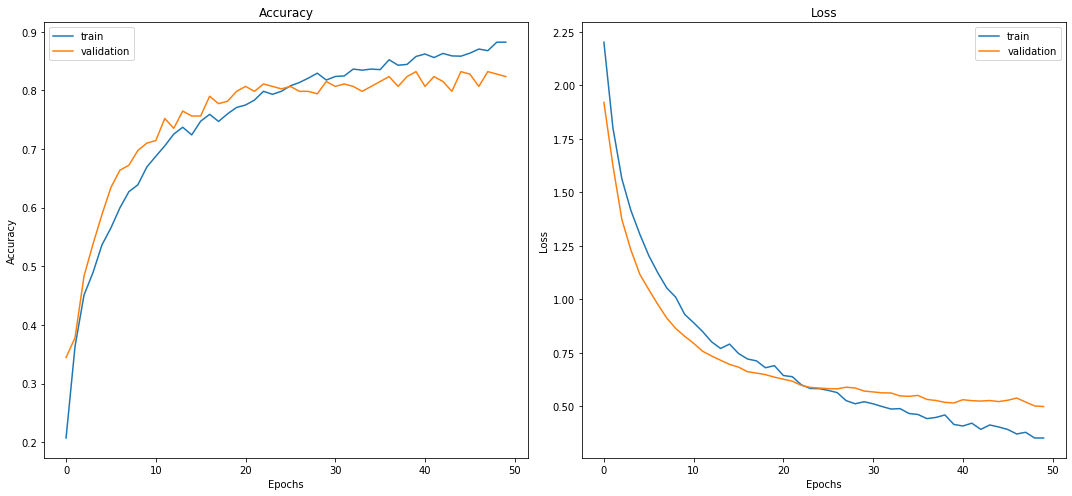

In [116]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [117]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


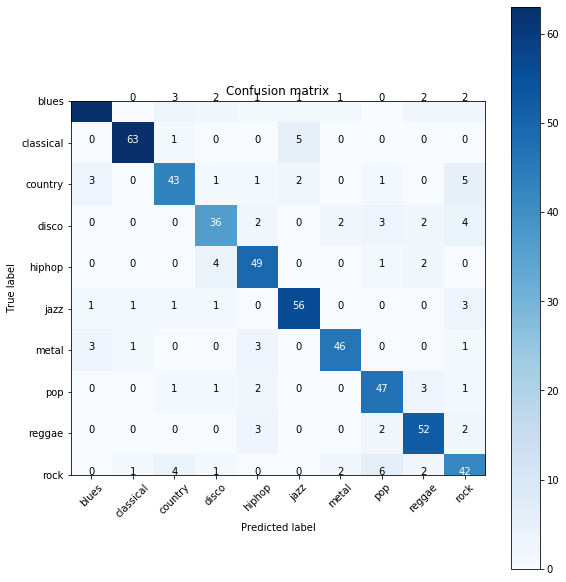

In [118]:
from sklearn.metrics import confusion_matrix
preds = model1.predict_classes(X_test)
cm = confusion_matrix(preds,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=False)

In [122]:
#
test_loss, test_acc = model1.evaluate(Xt1,yt1)
print(test_loss, test_acc)

10/10 [==============================] - 0s 721us/step
0.8743184804916382 0.5


In [123]:
test_loss, test_acc = model1.evaluate(Xt2,yt2)
print(test_loss, test_acc)

20/20 [==============================] - 0s 128us/step
0.9517585635185242 0.6499999761581421


In [124]:
test_loss, test_acc = model1.evaluate(Xt3,yt3)
print(test_loss, test_acc)

30/30 [==============================] - 0s 174us/step
0.8605776429176331 0.699999988079071


In [125]:
for i in model1.predict_classes(Xt3):
    print (i)

5
0
5
1
1
1
2
2
3
3
3
3
4
4
4
5
5
5
4
6
6
7
7
7
9
4
9
9
2
2


In [92]:
test_loss, test_acc = model1.evaluate(X_test,y_test)
print(test_loss, test_acc)

594/594 [==============================] - 0s 79us/step
0.5116009172365722 0.8383838377817713
